<a href="https://colab.research.google.com/github/FlexliTushar/Flow-Charts/blob/main/TMSDynamicInfeedFeature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TMS Dynamic Infeed Management

## Strategy for dynamic case (Policy 2)

In [ ]:
// simulated bot will send this to messaging server which will update this in bot_position.json file
if(assignedStation == DroppingStation)
{
  SEND bot_position with Rule D;
}
else
{
  SEND bot_position with Rule N;
}
// Inside TMS
GET unresolvedBotPositions;
// using dynamicinfeedpolicy class
GET optimisedInfeedStations for
unresolvedBotPositions;
HOW?;
for( every botPosition )
{
  if(Rule == D)
  {
    // if already responded for this bot
    if((botPosition, assignedStationId) tuple
    already exist in resolvedInfeeds)
    {
      continue;
    }
    FIND optimalInfeedStation;
    // if comes out to be same then no need to send it
    if(optimalInfeed == InfeedStation of bot)
    {
      continue;
    }
    // redirecetdInfeeds list will be used to write new infeed while writing bot_motor.json
    ADD (botId, AssignedStation, optimalInfeed)
    tuple in optimisedInfeeds;
  }
}
Return optimisedInfeeds;
// optimisedInfeedStation will go as parameter
WriteMotorCommand;
if(Rule == R)
{
  continue;
}
else
{
  if((botPosition, assignedStationId) tuple
  exist in optimisedInfeedStations)
  {
    WRITE Rule = D and InfeedStation = 
    InfeedStation in optimisedInfeedStations;
    ADD this tuple to resolvedInfeeds;
  }
}
// again in simulated bot side
if(Rule == D)
{
  CHANGE infeedStation = infeedStation in response;
  RECALCULATE Planned_Path to new infeed;
}


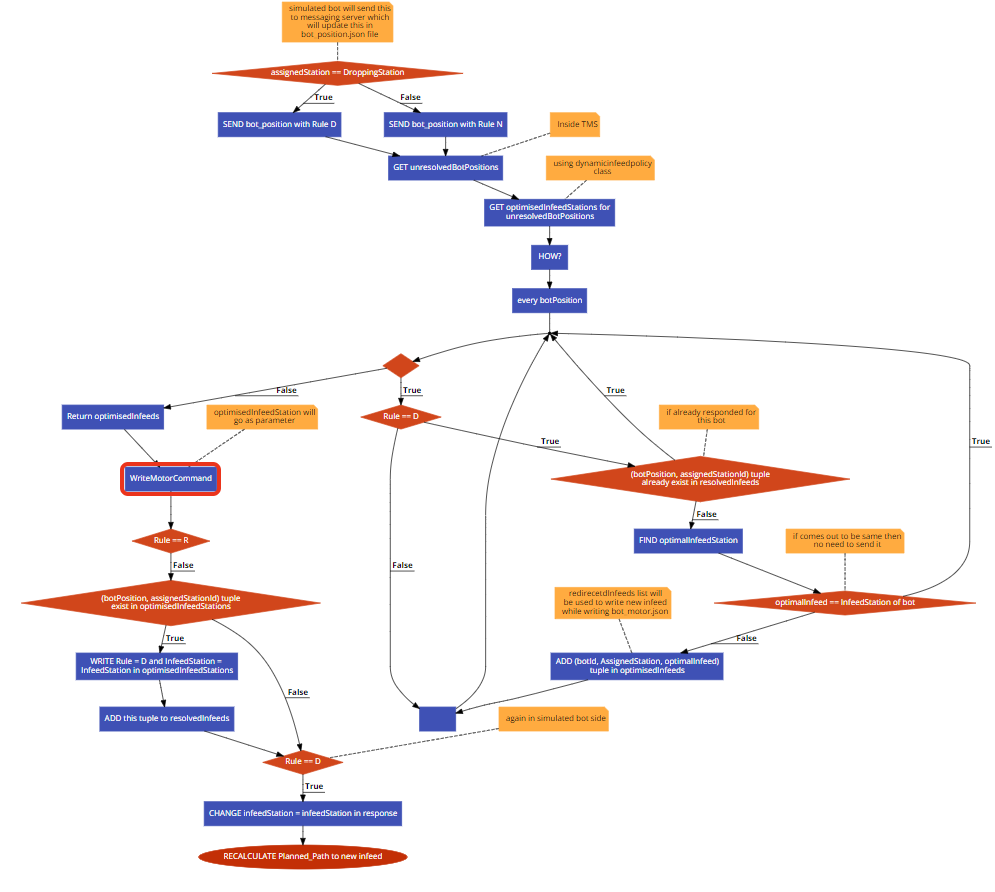